In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import fsolve,root
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
%matplotlib inline
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings("ignore")

In [15]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable
from pulp import GLPK

model = LpProblem(name="small-problem", sense=LpMaximize)
x = LpVariable(name="x", lowBound=0, cat="Integer")
y = LpVariable(name="y", lowBound=0,cat="Integer")

model+=x+2*y

model+=(x+y<=4)
model+=(x<=2)
model+=(x>=0)
model+=(y<=4)
model+=(y>=0)

# Solve the optimization problem
status = model.solve()

print(f"status: {model.status}, {LpStatus[model.status]}")
print(f"objective: {model.objective.value()}")

for var in model.variables():
    print(f"{var.name}: {var.value()}")

for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.value()}")

status: 1, Optimal
objective: 8.0
x: 0.0
y: 4.0
_C1: 0.0
_C2: -2.0
_C3: 0.0
_C4: 0.0
_C5: 4.0


In [44]:
x=52276
t=-0.084848*np.log(x)+0.094692*np.log(5474.7)-0.227*0.1++0.3089
print(t)

0.17948507802073155


In [1]:
from gekko import GEKKO

# Initialize Model
m = GEKKO(remote=True)

#help(m)

#define parameter
eq = m.Param(value=40)

#initialize variables
x1,x2,x3,x4 = [m.Var() for i in range(4)]

#initial values
x1.value = 1
x2.value = 5
x3.value = 5
x4.value = 1

#lower bounds
x1.lower = 1
x2.lower = 1
x3.lower = 1
x4.lower = 1

#upper bounds
x1.upper = 5
x2.upper = 5
x3.upper = 5
x4.upper = 5

#Equations
m.Equation(x1*x2*x3*x4>=25)
m.Equation(x1**2+x2**2+x3**2+x4**2==eq)

#Objective
m.Obj(x1*x4*(x1+x2+x3)+x3)  #default minimize 


#Set global options
m.options.IMODE = 3 #steady state optimization

#Solve simulation
m.solve() # solve on public server

#Results
print('')
print('x1: ' + str(x1.value))
print('x2: ' + str(x2.value))
print('x3: ' + str(x3.value))
print('x4: ' + str(x4.value))
print('Objective: ' + str(m.options.objfcnval))


apm 111.203.187.67_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            6
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:              5
 Number of total equations: -            2
 Number of slack variables: -            1
 ---------------------------------------
 Degrees of freedom       :              2
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

In [9]:
from gekko import GEKKO

# Initialize Model
m = GEKKO(remote=True)

#help(m)

#define parameter
eq = m.Param(value=40)

#initialize variables
x1,x2,x3,x4 = [m.Var() for i in range(4)]

#initial values
x1.value = 1
x2.value = 5
x3.value = 5
x4.value = 1

#lower bounds
x1.lower = 1
x2.lower = 1
x3.lower = 1
x4.lower = 1

#upper bounds
x1.upper = 5
x2.upper = 5
x3.upper = 5
x4.upper = 5

#Equations
m.Equation(x1*x2*x3*x4>=25)
m.Equation(x1**2+x2**2+x3**2+x4**2==eq)

#Objective
m.Maximize(x1*x4*(x1+x2+x3)+x3)  #default minimize 


#Set global options
m.options.IMODE = 3 #steady state optimization

#Solve simulation
m.solve() # solve on public server

#Results
print('')
print('x1: ' + str(x1.value))
print('x2: ' + str(x2.value))
print('x3: ' + str(x3.value))
print('x4: ' + str(x4.value))
print('Objective: ' + str(m.options.objfcnval))


apm 111.203.187.67_gk_model7 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            6
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:              5
 Number of total equations: -            2
 Number of slack variables: -            1
 ---------------------------------------
 Degrees of freedom       :              2
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

In [40]:
from gekko import GEKKO
m = GEKKO(remote=True)
#m.options.SOLVER = 1
x = m.Var(10000,lb=10000,ub=100000)
y = m.Var(5000,lb=5000,ub=50000)

m.Minimize(x)
m.Equation((x*(-0.072908*m.log(x)+0.11284*m.log(y*0.9)-0.003982)/5474*0.7*1.03*27*1.1/1.2+x*(-0.0848*m.log(x)+0.0946*np.log(6552.7)-0.227*0.1+0.3089)/5474/9*0.78*27)>=37)

m.solve()
print('x:',x.value[0])
x=x.value[0]
print(-0.0848*np.log(x)+0.0946*np.log(6552.7)-0.227*0.1+0.3089)
print((-0.0848*np.log(x)+0.0946*np.log(6552.7)-0.227*0.1+0.3089)*x)
#print('Z:  ',Z.value[0])

apm 111.201.20.220_gk_model38 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            3
   Intermediates:            0
   Connections  :            0
   Equations    :            2
   Residuals    :            2
 
 Number of state variables:              3
 Number of total equations: -            1
 Number of slack variables: -            1
 ---------------------------------------
 Degrees of freedom       :              1
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program c

# 宁波定价

In [16]:
from gekko import GEKKO
m = GEKKO(remote=True)
#m.options.SOLVER = 1
x = m.Var(10000,lb=10000,ub=100000)
y = m.Var(5000,lb=5000,ub=50000)

m.Minimize(x)
m.Equation((-0.072908*m.log(x)+0.11284*m.log(y*0.8)+0.03082)>=0.3)
m.Equation((x*(-0.072908*m.log(x)+0.11284*m.log(y*0.8)+0.03082)/y*0.78*1*37*1.2/1.2+
          x*(-0.072908*m.log(x)+0.11284*m.log(y*0.8)+0.03082)/y/4*0.78*30)>=37)

m.solve()
print('x:',x.value[0])
print('y:',y.value[0])
x=x.value[0]
y=y.value[0]
print(-0.072908*np.log(x)+0.11284*np.log(y*0.8)+0.03982)
print((x*(-0.072908*np.log(x)+0.11284*np.log(y*0.8)+0.03982)/y*0.78*1*37*1.2/1.2+
          x*(-0.072908*np.log(x)+0.11284*np.log(y*0.8)+0.03982)/y/4*0.78*30))
#print('Z:  ',Z.value[0])

apm 111.203.187.67_gk_model14 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:              4
 Number of total equations: -            2
 Number of slack variables: -            2
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program c

# 供需模型

In [173]:
model_input= "/Users/didi/Downloads/专车生态健康-成交率模型数据-2019年全数据.csv"
df = pd.read_csv(model_input,low_memory=False)
gulf_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,32,33,34,35,36,37,38,41,42,45,47,49,52,81,82,83,84,85,86,87,88,89,91,116,132,133]
input_data = df[df.city_id.isin(gulf_list)]
del df

parameter_input= "/Users/didi/Downloads/专车54城现状数据.csv"   
parameters = pd.read_csv(parameter_input)
parameter_data = parameters[parameters.city_id.isin(gulf_list)]
del parameters

elastic=pd.read_csv("/Users/didi/Downloads/专车弹性.csv",sep='\t')
elastic.columns=['city_id','coupon','code','ecr']

city_iph=pd.read_csv("/Users/didi/Downloads/city_iph.csv",encoding='gbk')

In [12]:
gulf_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,32,33,34,35,36,37,38,41,42,45,47,49,52,81,82,83,84,85,86,87,88,89,91,132,133]

In [174]:
pd.set_option('display.max_columns',None)   ### 拟合模型供需模型， 成交率 ~ log(需供比) + log(需)
input_data.head()

,city_id,city_name,city_type,region,admin_level,dt,day_num,gulf_call_grid_num,select_call_grid_num,fast_call_grid_num,ck_fin_cnt,ck_fin_cnt_no_GD,gulf_penetration,gulf_grid_call_cnt,gulf_grid_fin_cnt,gulf_fast_price_ratio,gulf_fast_iph_ratio,select_penetration,select_grid_call_cnt,select_grid_fin_cnt,select_fast_price_ratio,select_fast_iph_ratio,fast_grid_call_cnt,fast_grid_fin_cnt,gulf_call_cnt,gulf_ans_cnt,gulf_fin_cnt,gulf_gmv,gulf_no_GD_call_cnt,gulf_no_GD_ans_cnt,gulf_no_GD_fin_cnt,gulf_no_GD_gmv,gulf_GD_gmv_rate,gulf_no_GD_ans_rate,gulf_no_GD_fin_rate,gulf_aps,gulf_dis_gmv,gulf_dis_actual_cost,gulf_fin_order_dis,gulf_fin_order_dur,gulf_cancel_order_est_dis,gulf_cancel_order_est_dur,gulf_business_profit_rate,gulf_subsidy_b_rate,gulf_subsidy_c_rate,gulf_tsh,gulf_online_tsh_drinum,gulf_dri_online_dur,gulf_charge_dur_rate,gulf_IPH,gulf_IPH_divide,select_call_cnt,select_ans_cnt,select_fin_cnt,select_gmv,select_no_GD_call_cnt,select_no_GD_ans_cnt,select_no_GD_fin_cnt,select_no_GD_gmv,select_GD_gmv_rate,select_no_GD_ans_rate,select_no_GD_fin_rate,select_aps,select_dis_gmv,select_dis_actual_cost,select_fin_order_dis,select_fin_order_dur,select_cancel_order_est_dis,select_cancel_order_est_dur,select_business_profit_rate,select_subsidy_b_rate,select_subsidy_c_rate,select_tsh,select_online_tsh_drinum,select_dri_online_dur,select_charge_dur_rate,select_IPH,select_IPH_divide,fast_call_cnt,fast_ans_cnt,fast_fin_cnt,fast_gmv,fast_no_GD_call_cnt,fast_no_GD_ans_cnt,fast_no_GD_fin_cnt,fast_no_GD_gmv,fast_GD_gmv_rate,fast_no_GD_ans_rate,fast_no_GD_fin_rate,fast_aps,fast_dis_gmv,fast_dis_actual_cost,fast_fin_order_dis,fast_fin_order_dur,fast_cancel_order_est_dis,fast_cancel_order_est_dur,fast_business_profit_rate,fast_subsidy_b_rate,fast_subsidy_c_rate,fast_tsh,fast_online_tsh_drinum,fast_dri_online_dur,fast_charge_dur_rate,fast_IPH,fast_IPH_divide,ck_fin_cnt_rank,gulf_penetration_rank,select_penetration_rank,gulf_grid_call_cnt_rank,select_grid_call_cnt_rank,fast_grid_call_cnt_rank,gulf_grid_fin_cnt_rank,select_grid_fin_cnt_rank,fast_grid_fin_cnt_rank,all_pernum,all_pernum_rank,month_income,month_income_rank,iph_l,iph_h,price_rate_l,price_rate_h
0,1.0,北京市,三品类,华北区域,1.0,2019-02-02,1,2131.0,1598.0,4128.0,746510,732812.0,0.114966,56.054180,46.949125,1.4998384317259732,1.0060608866758918,0.088608,74.584672,47.451220,0.615053,1.2026862181913422,118.439101,95.268073,120012.0,92249.0,85823.0,6152220.98,119999.0,92241.0,85815.0,6151126.98,0.000178,0.768681,0.7151309594246619,71.678925,5.600763986346839,5.48268433585789,12.798062,21.824969,15.177627,21.662924,0.131640,0.000989,0.021081,76687.033333,8739.0,8.775264,0.4073405391002651,65.04475702613783,64.2449286906826,120678.0,71665.0,66147.0,2522517.11,120658.0,71662.0,66145.0,2522449.27,0.000027,0.593927,0.54820235707537,38.135147,4.285189,4.252534,8.899291,17.225493,13.245878,22.754729,0.096395,0.039268,0.007620,47858.083333,8398.0,5.698748,0.549036,77.75715553301515,58.767126,711819.0,533650.0,496823.0,16793529.00,686091.0,522353.0,488231.0,16488758.69,0.018148,0.7613465269184408,0.7116125994948193,33.772453,3.734244881231395,3.722992061378341,9.043985,16.828168,12.665812,22.243845,0.12306978580004921,0.021011481677615226,0.002959,260461.766667,46119.0,5.647602,0.558138358033269,64.65290310713806,54.05556078416115,1,3,16,1,2,2,2,5,23,2173.0,3.0,7707.0,1.0,51.1,59.2,1.4,1.7
1,17.0,成都市,三品类,西南区域,2.0,2019-02-02,1,1478.0,1368.0,5900.0,622549,614411.0,0.031875,19.442867,16.802710,1.664807670202299,1.3943574841532698,0.102244,59.681752,52.823237,2.769649,1.1216809371783107,94.812058,96.129694,28756.0,22152.0,19844.0,1036367.18,28755.0,22151.0,19844.0,1036367.18,NaN,0.770336,0.6901060685098244,52.225720,4.290085796154034,4.112804225313632,12.173584,19.797630,13.862976,19.281369,0.090862,0.036496,0.041324,14858.716667,2059.0,7.216472,0.4407923669196794,57.36526173489635,54.75103726993022,81764.0,69702.0,63652.0,1724230.12,81762.0,69702.0,63651.0,1724146.84,0.000048,0.852499,0.7784912306450429,27.087506,2.9

In [177]:
input_data.gulf_business_profit_rate

0         0.131640
1         0.090862
2         0.110214
3         0.111045
4         0.125194
            ...   
131503    0.075305
131506    0.123767
131508    0.024468
131524    0.097342
131540    0.092701
Name: gulf_business_profit_rate, Length: 19710, dtype: float64

In [4]:
parameter_data.head()  ## 现状数据

,city_id,city_name,ck_fin_cnt,gulf_penetration,gulf_fast_price_ratio,gulf_fast_iph_ratio,gulf_call,gulf_finish,gulf_gmv,gulf_f_rate,gulf_aps,gulf_price,gulf_distance,gulf_time,gulf_time_h,gulf_tsh,gulf_charge_dur_rate,gulf_iph,fast_call,fast_finish,fast_gmv,fast_f_rate,fast_aps,fast_price,fast_distance,fast_time,fast_time_h,fast_tsh,fast_charge_dur_rate,fast_iph,iph_l,iph_h,price_rate_l,price_rate_h,model_tsh,model_call
0,1,北京市,1399670,0.119208,1.551514,1.296809,199341,166853,11032258,0.837033,66.079249,5.583918,11.833849,25.187650,0.419794,152283.55750,0.470211,59.913153,1272487,1068570,32580645,0.839749,30.626767,3.599011,8.509772,18.526411,0.308774,690322.58,0.595067,46.200450,51.1,59.2,1.4,1.7,NaN,NaN
1,2,深圳市,598027,0.104700,1.360800,1.545302,79482,62613,4064516,0.787840,65.185170,5.475000,11.905966,23.458827,0.390980,56410.84623,0.447424,60.491665,620453,511412,17193548,0.824255,33.605790,4.023369,8.352649,18.862448,0.314374,370967.74,0.479525,39.145530,53.8,62.2,1.4,1.7,NaN,NaN
2,3,广州市,608887,0.070984,1.397769,1.557513,57406,43221,2980645,0.752878,68.909667,5.498371,12.532743,23.908503,0.398475,40280.47848,0.436260,60.668845,666144,559188,17967742,0.839440,32.146041,3.933676,8.172010,17.866545,0.297776,422580.65,0.455490,38.952393,56.1,64.1,1.4,1.7,NaN,NaN
3,4,上海市,939645,0.102265,1.602991,1.486285,120044,96093,7000000,0.800500,72.950514,6.647423,10.974254,24.296417,0.404940,76217.15913,0.520632,77.874336,792161,638863,20548387,0.806481,32.159092,4.146887,7.754996,17.646753,0.294113,370967.74,0.543784,52.395280,57.2,68.5,1.4,1.7,NaN,NaN
4,5,杭州市,524968,0.059937,1.421443,1.345552,41714,31465,1835484,0.754336,58.278297,5.333913,10.925993,22.446936,0.374116,27289.27742,0.431944,55.642634,519406,425772,10354839,0.819728,24.315242,3.752463,6.479808,15.385011,0.256417,258458.66,0.553288,41.353030,52.4,60.0,1.4,1.7,NaN,NaN


In [5]:
elastic.head() #弹性,潍坊没有弹性数据

,city_id,coupon,code,ecr
0,1,0.70,1 0.7,0.210101
1,1,0.75,1 0.75,0.171931
2,1,0.80,1 0.8,0.143153
3,1,0.85,1 0.85,0.127024
4,1,0.90,1 0.9,0.106412


In [6]:
city_iph.head()   ##收入底线

,city_name,city_id,green,blue,yellow,orange
0,常州市,45,41.0,39.0,36.0,34.0
1,大连市,14,36.0,33.8,30.8,28.8
2,福州市,34,50.5,47.0,44.0,42.0
3,贵阳市,82,41.0,39.0,36.0,34.0
4,哈尔滨市,16,37.0,34.8,31.8,29.8


In [7]:
def get_coef(city_id,period,product_line,outlier,contamination):
            
    dat = input_data[input_data['city_id'] == city_id]
    dat['dt'] =  pd.to_datetime(dat['dt']).dt.strftime('%Y-%m-%d')
    dat['year_month'] = dat['dt'].str[:7]
    dat = dat[(dat['year_month']>=period[0])&(dat['year_month']<=period[1])]
    dat = dat[dat['gulf_no_GD_call_cnt'].astype(float) > 0]
    dat = dat[dat['gulf_fin_order_dur'].astype(float) > 0]
    dat = dat[dat['gulf_tsh'].astype(float) > 0]
     
    gulf1 = dat
    gulf1['gulf_demand_time'] = gulf1['gulf_fin_order_dur']/60*gulf1['gulf_no_GD_call_cnt']  # 需求时间
    gulf1['gulf_log_demand_time'] = np.log(gulf1['gulf_demand_time'])                     # ln(需求时间)
    gulf1['gulf_log_tsh'] = np.log(gulf1['gulf_tsh'])                                 # TSH
    gulf1['gulf_ds_rate'] = gulf1['gulf_demand_time']/gulf1['gulf_tsh']               # 需供比 
    gulf1['gulf_log_ds_rate'] = np.log(gulf1['gulf_ds_rate'])                             # ln(供需比)
    gulf1['f_rate'] = gulf1['gulf_no_GD_fin_rate']
      
    gulf1['pl_zc'] = 'zc'
    gulf = gulf1[['city_id','city_name','pl_zc','dt','year_month','gulf_demand_time',
                  'gulf_log_demand_time','gulf_log_tsh','gulf_ds_rate','gulf_log_ds_rate','f_rate']]    
    gulf.columns = ['city_id','city_name','pl','dt','year_month','demand_time','log_demand_time',
                    'log_tsh','ds_rate','log_ds_rate','f_rate']
 
    read_in_data = gulf
        
    read_in_data.f_rate = read_in_data.f_rate.astype(float)
    
    if outlier == 0:
        None
    elif outlier == 1:
        clf = IsolationForest(random_state=0, contamination=contamination)
        
        ## 成交率 ~ log(需供比) + log(需)
        clf.fit(read_in_data.loc[:,['log_demand_time','log_ds_rate']])
        read_in_data['predict'] = clf.predict(read_in_data.loc[:,['log_demand_time','log_ds_rate']])
        
# #         ## 成交率 ~ log(需供比) + (需)
# #         clf.fit(read_in_data.loc[:,['demand_time','log_ds_rate']])
# #         read_in_data['predict'] = clf.predict(read_in_data.loc[:,['demand_time','log_ds_rate']])
        
# #         ## 成交率 ~ log(需) + log(供)
# #         clf.fit(read_in_data.loc[:,['log_demand_time','log_tsh']])
# #         read_in_data['predict'] = clf.predict(read_in_data.loc[:,['log_demand_time','log_tsh']])
        
        read_in_data = read_in_data[read_in_data['predict']>0]

    x = read_in_data.loc[:, ['log_demand_time','log_ds_rate']]
#     x = read_in_data.loc[:, ['demand_time','log_ds_rate']]
#     x = read_in_data.loc[:, ['log_demand_time','log_tsh']]
    
    y = read_in_data.loc[:,'f_rate']                                      # 成交率

    model = LinearRegression()                                            # 线性回归
    lr = model.fit(x, y)
    k1 = lr.coef_[1]                                                      # 需供比系数
    k2 = lr.coef_[0]                                                      # 需求系数
    b = lr.intercept_

# # 成交率~ k1(供需比)+k2(需求时间)+b     
    
    y_true = y
    y_pred = model.predict(x)
    r2 = r2_score(y_true, y_pred)

    return k1, k2, b, r2





In [10]:
city=[]
k1=[]
k2=[]
b=[]
r2=[]
tm=[]
outlier=[]


for city_id in gulf_list:
    for period in [['2019-03','2019-12'],['2019-04','2019-12'],['2019-05','2019-12'],
                   ['2019-06','2019-12'],['2019-07','2019-12']]:
        
        for i in ([0,1]):
            x=get_coef(city_id,period,'zc',i,contamination=0.15)
            k1.append(x[0])
            k2.append(x[1])
            b.append(x[2])
            r2.append(x[3])
            tm.append(str(period[0])+'_'+str(period[1]))
            outlier.append(i)
            city.append(city_id)
                    
coef=pd.DataFrame({'city_id':city,
              'k1':k1,'k2':k2,'b':b,'r2':r2, 'period':tm,'outlier':outlier})

coef=coef.iloc[coef.groupby('city_id').idxmax()['r2']]  #最大r2的k1 k2 b 


In [11]:
coef

,city_id,k1,k2,b,r2,period,outlier
2,1,-0.445227,0.140993,-1.021875,0.726014,2019-04_2019-12,0
18,2,-0.393335,0.158344,-1.076943,0.780846,2019-07_2019-12,0
22,3,-0.343367,0.061433,-0.050976,0.743672,2019-04_2019-12,0
38,4,-0.520552,0.135645,-0.900904,0.887246,2019-07_2019-12,0
44,5,-0.403354,0.090680,-0.314927,0.695093,2019-05_2019-12,0
50,6,-0.376400,0.073563,-0.139711,0.856892,2019-03_2019-12,0
68,7,-0.446618,0.104345,-0.468261,0.889182,2019-07_2019-12,0
78,8,-0.450607,0.071490,-0.118154,0.938069,2019-07_2019-12,0
86,9,-0.418331,0.060097,-0.029386,0.800647,2019-06_2019-12,0
92,10,-0.325434,-0.012071,0.686953,0.738904,2019-04_2019-12,0


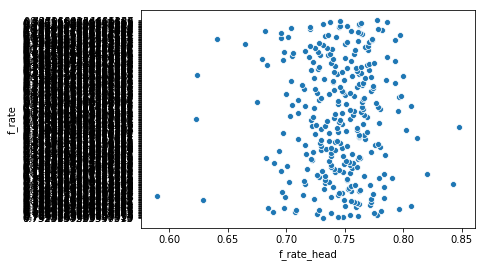

In [16]:
dat = input_data[input_data['city_id'] == 23]
dat['dt'] =  pd.to_datetime(dat['dt']).dt.strftime('%Y-%m-%d')
dat['year_month'] = dat['dt'].str[:7]
dat = dat[(dat['year_month']>='2019-03')&(dat['year_month']<='2019-12')]
dat = dat[dat['gulf_no_GD_call_cnt'].astype(float) > 0]
dat = dat[dat['gulf_fin_order_dur'].astype(float) > 0]
dat = dat[dat['gulf_tsh'].astype(float) > 0]
     
gulf1 = dat
gulf1['gulf_demand_time'] = gulf1['gulf_fin_order_dur']/60*gulf1['gulf_no_GD_call_cnt']  # 需求时间
gulf1['gulf_log_demand_time'] = np.log(gulf1['gulf_demand_time'])                     # ln(需求时间)
gulf1['gulf_log_tsh'] = np.log(gulf1['gulf_tsh'])                                 # TSH
gulf1['gulf_ds_rate'] = gulf1['gulf_demand_time']/gulf1['gulf_tsh']               # 需供比 
gulf1['gulf_log_ds_rate'] = np.log(gulf1['gulf_ds_rate'])                             # ln(供需比)
gulf1['f_rate'] = gulf1['gulf_no_GD_fin_rate']
      
gulf1['pl_zc'] = 'zc'
gulf = gulf1[['city_id','city_name','pl_zc','dt','year_month','gulf_demand_time',
                  'gulf_log_demand_time','gulf_log_tsh','gulf_ds_rate','gulf_log_ds_rate','f_rate']]    
gulf.columns = ['city_id','city_name','pl','dt','year_month','demand_time','log_demand_time',
                    'log_tsh','ds_rate','log_ds_rate','f_rate']

gulf['f_rate_head']=-0.207814*gulf['log_ds_rate']+-0.076069*gulf['log_demand_time']+1.290197

sns.scatterplot(x=gulf['f_rate_head'],y=gulf['f_rate'])

In [86]:
def get_expected(city_id,price_ratio,f_rate,driver_divide):
 ## read in parameters   
    temp=parameter_data[parameter_data.city_id==city_id]
    gulf_avg_time=temp['gulf_time'].iloc[0]/60
    gulf_distance=temp['gulf_distance'].iloc[0]
    fast_price=temp['fast_price'].iloc[0]
    k1,k2,b=coef[coef.city_id==city_id][['k1','k2','b']].iloc[0]
    
    nearest_coupon=round(round((price_ratio/temp['gulf_fast_price_ratio'])/0.05)*0.05,2)
    
    grp=elastic.groupby('city_id')
    mm=grp.get_group(city_id)
    
    try:
        call=(mm[mm.coupon==float(nearest_coupon)].ecr.iloc[0]/mm[mm.coupon==1].ecr.iloc[0])*temp['gulf_call'].iloc[0]
        tsh=gulf_avg_time*call/(np.exp((f_rate - np.log(gulf_avg_time*call)*k2 - b)/k1))
        gmv=call*f_rate*gulf_distance*fast_price*price_ratio
        iph=gmv*driver_divide*(1+0)/tsh  #0.78线上分成，0% B补
        return call,tsh, gmv,iph
    except:
        return None,None,None,None
    
    

In [148]:
expected_call=[]
expected_tsh=[]
expected_gmv=[]
expected_iph=[]
city=[]
price=[]
finish_rate=[]

for city_id in gulf_list:
    for price_ratio in ([1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6]):
        for f_rate in ([0.75,0.78,0.8,0.83,0.85]):
            x=get_expected(city_id,price_ratio,f_rate,0.78)
            expected_call.append(x[0])
            expected_tsh.append(x[1])
            expected_gmv.append(x[2])
            expected_iph.append(x[3])
            city.append(city_id)
            price.append(price_ratio)
            finish_rate.append(f_rate)

result=pd.DataFrame({'city_id':city,'price_ratio':price,'expected_f_rate':finish_rate,
                    'expected_call':expected_call, 'expected_tsh':expected_tsh, 'expected_gmv':expected_gmv,
                    'expected_iph':expected_iph})
result=result[result.expected_call.notnull()]
result.head()

,city_id,price_ratio,expected_f_rate,expected_call,expected_tsh,expected_gmv,expected_iph
0,1,1.1,0.75,514048.529638,236177.420621,1.806206e+07,59.651802
1,1,1.1,0.78,514048.529638,252639.787130,1.878455e+07,57.995399
2,1,1.1,0.80,514048.529638,264247.362414,1.926620e+07,56.869578
3,1,1.1,0.83,514048.529638,282666.298982,1.998868e+07,55.157521
4,1,1.1,0.85,514048.529638,295653.447138,2.047034e+07,54.005335


In [149]:
result.shape

(2275, 7)

In [150]:
output=parameter_data[['city_id', 'city_name','gulf_call','gulf_finish','gulf_gmv',
               'gulf_f_rate','gulf_fast_price_ratio','gulf_iph','gulf_tsh',
                       'gulf_fast_iph_ratio']].merge(result,how='left',on='city_id')
output['is_call_increase']=np.where(output['expected_call']>output['gulf_call'],1,0)
output['is_tsh_increase']=np.where(output['expected_tsh']>output['gulf_tsh'],1,0)
output['is_gmv_increase']=np.where(output['expected_gmv']>output['gulf_gmv'],1,0)

output=output.merge(city_iph,how='left',on=['city_id','city_name'])
output['is_iph_yellow']=np.where(output['expected_iph']<=output[' yellow '],1,0)
output['is_iph_orange']=np.where(output['expected_iph']<=output[' orange '],1,0)

output.head()

,city_id,city_name,gulf_call,gulf_finish,gulf_gmv,gulf_f_rate,gulf_fast_price_ratio,gulf_iph,gulf_tsh,gulf_fast_iph_ratio,price_ratio,expected_f_rate,expected_call,expected_tsh,expected_gmv,expected_iph,is_call_increase,is_tsh_increase,is_gmv_increase,green,blue,yellow,orange,is_iph_yellow,is_iph_orange
0,1,北京市,199341,166853,11032258,0.837033,1.551514,59.913153,152283.5575,1.296809,1.1,0.75,514048.529638,236177.420621,1.806206e+07,59.651802,1,1,1,61.0,58.0,55.0,53.0,0,0
1,1,北京市,199341,166853,11032258,0.837033,1.551514,59.913153,152283.5575,1.296809,1.1,0.78,514048.529638,252639.787130,1.878455e+07,57.995399,1,1,1,61.0,58.0,55.0,53.0,0,0
2,1,北京市,199341,166853,11032258,0.837033,1.551514,59.913153,152283.5575,1.296809,1.1,0.80,514048.529638,264247.362414,1.926620e+07,56.869578,1,1,1,61.0,58.0,55.0,53.0,0,0
3,1,北京市,199341,166853,11032258,0.837033,1.551514,59.913153,152283.5575,1.296809,1.1,0.83,514048.529638,282666.298982,1.998868e+07,55.157521,1,1,1,61.0,58.0,55.0,53.0,0,0
4,1,北京市,199341,166853,11032258,0.837033,1.551514,59.913153,152283.5575,1.296809,1.1,0.85,514048.529638,295653.447138,2.047034e+07,54.005335,1,1,1,61.0,58.0,55.0,53.0,1,0


In [151]:
filename='/Users/didi/Desktop/gulf_price_elastic.xlsx'

writer = pd.ExcelWriter(filename, engine='openpyxl')
output.to_excel(writer,sheet_name='raw',index=False)
writer.save()

In [3]:
output=pd.read_excel('/Users/didi/Desktop/gulf_price_elastic.xlsx')
output.head()

,city_id,city_name,gulf_call,gulf_finish,gulf_gmv,gulf_f_rate,gulf_fast_price_ratio,gulf_iph,gulf_tsh,gulf_fast_iph_ratio,...,expected_iph,is_call_increase,is_tsh_increase,is_gmv_increase,green,blue,yellow,orange,is_iph_yellow,is_iph_orange
0,1,北京市,199341,166853,11032258,0.837033,1.551514,59.913153,152283.5575,1.296809,...,59.651802,1,1,1,61.0,58.0,55.0,53.0,0,0
1,1,北京市,199341,166853,11032258,0.837033,1.551514,59.913153,152283.5575,1.296809,...,57.995399,1,1,1,61.0,58.0,55.0,53.0,0,0
2,1,北京市,199341,166853,11032258,0.837033,1.551514,59.913153,152283.5575,1.296809,...,56.869578,1,1,1,61.0,58.0,55.0,53.0,0,0
3,1,北京市,199341,166853,11032258,0.837033,1.551514,59.913153,152283.5575,1.296809,...,55.157521,1,1,1,61.0,58.0,55.0,53.0,0,0
4,1,北京市,199341,166853,11032258,0.837033,1.551514,59.913153,152283.5575,1.296809,...,54.005335,1,1,1,61.0,58.0,55.0,53.0,1,0


In [351]:
x=pd.read_excel('/Users/didi/Desktop/规划/供需模型.xlsx',sheet_name='raw')
x.columns=x.iloc[0].values
x=x.iloc[1:]
x.head()

,city_id,city_name,专车呼单,专车完单,专车gmv,专车成交率,专快价比,专车iph,专车tsh,专快iph比,预估价比,预估成交率,预估呼单,预估tsh,预估gmv,预估专车iph,呼单是否增长,tsh是否增长,gmv是否增长,iph绿,iph蓝,iph黄,iph橙,是否iph触达黄线,是否iph触达橙色
1,1,北京市,199341,166853,11032258,0.837033,1.55151,59.9132,152284,1.29681,1.1,0.75,514049,236177,1.80621e+07,59.6518,1,1,1,61,58,55,53,0,0
2,1,北京市,199341,166853,11032258,0.837033,1.55151,59.9132,152284,1.29681,1.1,0.78,514049,252640,1.87845e+07,57.9954,1,1,1,61,58,55,53,0,0
3,1,北京市,199341,166853,11032258,0.837033,1.55151,59.9132,152284,1.29681,1.1,0.8,514049,264247,1.92662e+07,56.8696,1,1,1,61,58,55,53,0,0
4,1,北京市,199341,166853,11032258,0.837033,1.55151,59.9132,152284,1.29681,1.1,0.83,514049,282666,1.99887e+07,55.1575,1,1,1,61,58,55,53,0,0
5,1,北京市,199341,166853,11032258,0.837033,1.55151,59.9132,152284,1.29681,1.1,0.85,514049,295653,2.04703e+07,54.0053,1,1,1,61,58,55,53,1,0


In [352]:
x.columns

Index(['city_id', 'city_name', '专车呼单', '专车完单', '专车gmv', '专车成交率', '专快价比',
       '专车iph', '专车tsh', '专快iph比', '预估价比', '预估成交率', '预估呼单', '预估tsh', '预估gmv',
       '预估专车iph', '呼单是否增长', 'tsh是否增长', 'gmv是否增长', 'iph绿', ' iph蓝', ' iph黄',
       'iph橙', '是否iph触达黄线', '是否iph触达橙色'],
      dtype='object')

In [356]:
mm=x[(x['预估价比']>=1.1)&(x['gmv是否增长']==1)&(x['是否iph触达橙色']==0)].reset_index()
#mm=mm.iloc[mm.groupby(['city_id','city_name']).idxmax()['预估gmv']]
mm.head()

,index,city_id,city_name,专车呼单,专车完单,专车gmv,专车成交率,专快价比,专车iph,专车tsh,专快iph比,预估价比,预估成交率,预估呼单,预估tsh,预估gmv,预估专车iph,呼单是否增长,tsh是否增长,gmv是否增长,iph绿,iph蓝,iph黄,iph橙,是否iph触达黄线,是否iph触达橙色
0,1,1,北京市,199341,166853,11032258,0.837033,1.55151,59.9132,152284,1.29681,1.1,0.75,514049,236177,1.80621e+07,59.6518,1,1,1,61,58,55,53,0,0
1,2,1,北京市,199341,166853,11032258,0.837033,1.55151,59.9132,152284,1.29681,1.1,0.78,514049,252640,1.87845e+07,57.9954,1,1,1,61,58,55,53,0,0
2,3,1,北京市,199341,166853,11032258,0.837033,1.55151,59.9132,152284,1.29681,1.1,0.8,514049,264247,1.92662e+07,56.8696,1,1,1,61,58,55,53,0,0
3,4,1,北京市,199341,166853,11032258,0.837033,1.55151,59.9132,152284,1.29681,1.1,0.83,514049,282666,1.99887e+07,55.1575,1,1,1,61,58,55,53,0,0
4,5,1,北京市,199341,166853,11032258,0.837033,1.55151,59.9132,152284,1.29681,1.1,0.85,514049,295653,2.04703e+07,54.0053,1,1,1,61,58,55,53,1,0


In [7]:
mm=output[(output.price_ratio>=1.1)&(output.is_gmv_increase==1)&(output.is_iph_yellow==0)].reset_index()
mm=mm.iloc[mm.groupby(['city_id','city_name']).idxmax()['expected_gmv']]
mm

,index,city_id,city_name,gulf_call,gulf_finish,gulf_gmv,gulf_f_rate,gulf_fast_price_ratio,gulf_iph,gulf_tsh,gulf_fast_iph_ratio,price_ratio,expected_f_rate,expected_call,expected_tsh,expected_gmv,expected_iph,is_call_increase,is_tsh_increase,is_gmv_increase,green,blue,yellow,orange,is_iph_yellow,is_iph_orange
4,14,1,北京市,199341,166853,11032258,0.837033,1.551514,59.913153,152283.557500,1.296809,1.20,0.85,420658.916789,257800.224542,1.827425e+07,55.290543,1,1,1,61.0,58.0,55.0,53.0,0,0
28,77,2,深圳市,79482,62613,4064516,0.787840,1.360800,60.491665,56410.846230,1.545302,1.35,0.80,79482.000000,57057.051253,4.111943e+06,56.212430,0,1,1,61.0,58.0,55.0,53.0,0,0
29,90,3,广州市,57406,43221,2980645,0.752878,1.397769,60.668845,40280.478480,1.557513,1.20,0.75,82482.677103,52690.788503,3.659738e+06,54.176371,1,1,1,59.0,56.5,53.5,51.5,0,0
37,160,4,上海市,120044,96093,7000000,0.800500,1.602991,77.874336,76217.159130,1.486285,1.55,0.75,132485.192992,74898.910613,7.009024e+06,72.992234,1,0,1,79.0,75.0,72.0,70.0,0,0
38,180,5,杭州市,41714,31465,1835484,0.754336,1.421443,55.642634,27289.277420,1.345552,1.20,0.75,75929.469222,39704.639027,2.801756e+06,55.040656,1,1,1,58.0,57.0,54.0,52.0,0,0
51,226,6,武汉市,22122,16835,925806,0.761016,1.439998,47.001120,15999.215590,1.374975,1.25,0.78,28902.763596,19783.974626,1.075379e+06,42.397744,1,1,1,48.0,45.0,42.0,40.0,0,0
61,281,7,天津市,18097,13891,622581,0.767603,1.526289,40.113229,12763.036020,1.297478,1.40,0.78,24134.626860,15656.829966,7.756365e+05,38.641059,1,1,1,42.5,41.0,38.0,36.0,0,0
68,305,8,沈阳市,11656,7624,320089,0.654090,1.698670,38.762980,6692.715590,1.256807,1.20,0.75,34122.050795,18864.024060,7.589462e+05,31.381321,1,1,1,36.0,34.0,31.0,29.0,0,0
100,440,10,西安市,24610,19280,941935,0.783746,1.549929,45.778982,18196.056990,1.437312,1.50,0.75,30829.195513,19609.890613,1.094305e+06,43.526892,1,1,1,50.0,46.0,43.0,41.0,0,0
102,466,11,南京市,27645,20374,1012903,0.736963,1.689967,55.715330,14928.848930,1.306547,1.30,0.78,56550.622771,26176.404362,1.684792e+06,50.203136,1,1,1,55.0,53.0,50.0,48.0,0,0


In [9]:
filename='/Users/didi/Desktop/gulf_price_elastic.xlsx'

writer = pd.ExcelWriter(filename, engine='openpyxl')
output.to_excel(writer,sheet_name='raw',index=False)
mm.to_excel(writer,sheet_name='could_increase_gmv',index=False)
writer.save()

In [18]:
mm=output[(output.price_ratio>=1.2)&(output.is_gmv_increase==1)&(output.expected_iph>=output[' yellow ']*0.9)].reset_index()
mm=mm.iloc[mm.groupby(['city_id','city_name']).idxmax()['expected_gmv']]
mm

,index,city_id,city_name,gulf_call,gulf_finish,gulf_gmv,gulf_f_rate,gulf_fast_price_ratio,gulf_iph,gulf_tsh,gulf_fast_iph_ratio,price_ratio,expected_f_rate,expected_call,expected_tsh,expected_gmv,expected_iph,is_call_increase,is_tsh_increase,is_gmv_increase,green,blue,yellow,orange,is_iph_yellow,is_iph_orange
4,14,1,北京市,199341,166853,11032258,0.837033,1.551514,59.913153,152283.557500,1.296809,1.20,0.85,420658.916789,257800.224542,1.827425e+07,55.290543,1,1,1,61.0,58.0,55.0,53.0,0,0
34,69,2,深圳市,79482,62613,4064516,0.787840,1.360800,60.491665,56410.846230,1.545302,1.25,0.85,86476.017229,68139.353849,4.401282e+06,50.382040,1,1,1,61.0,58.0,55.0,53.0,1,1
42,92,3,广州市,57406,43221,2980645,0.752878,1.397769,60.668845,40280.478480,1.557513,1.20,0.80,82482.677103,60950.229183,3.903721e+06,49.957189,1,1,1,59.0,56.5,53.5,51.5,1,1
61,136,4,上海市,120044,96093,7000000,0.800500,1.602991,77.874336,76217.159130,1.486285,1.30,0.78,180111.404999,99568.916759,8.311443e+06,65.109932,1,1,1,79.0,75.0,72.0,70.0,1,1
88,184,5,杭州市,41714,31465,1835484,0.754336,1.421443,55.642634,27289.277420,1.345552,1.20,0.85,75929.469222,50875.879001,3.175323e+06,48.682245,1,1,1,58.0,57.0,54.0,52.0,1,1
121,229,6,武汉市,22122,16835,925806,0.761016,1.439998,47.001120,15999.215590,1.374975,1.25,0.85,28902.763596,23827.604663,1.171888e+06,38.361911,1,1,1,48.0,45.0,42.0,40.0,1,1
142,268,7,天津市,18097,13891,622581,0.767603,1.526289,40.113229,12763.036020,1.297478,1.25,0.83,30633.563058,21022.617805,9.353640e+05,34.704712,1,1,1,42.5,41.0,38.0,36.0,1,1
174,309,8,沈阳市,11656,7624,320089,0.654090,1.698670,38.762980,6692.715590,1.256807,1.20,0.85,34122.050795,23551.259047,8.601390e+05,28.487156,1,1,1,36.0,34.0,31.0,29.0,1,1
223,383,9,郑州市,19373,14503,622581,0.748638,1.668238,43.635871,12520.686560,1.395498,1.45,0.83,25874.247873,18020.562858,8.024410e+05,34.732763,1,1,1,43.0,41.0,38.0,36.0,1,1
232,442,10,西安市,24610,19280,941935,0.783746,1.549929,45.778982,18196.056990,1.437312,1.50,0.80,30829.195513,22866.549769,1.167258e+06,39.816301,1,1,1,50.0,46.0,43.0,41.0,1,1


# 6.0版本拟合

In [212]:
df = pd.read_csv('/Users/didi/Downloads/gx_model.csv',low_memory=False,encoding='gbk')

elastic=pd.read_csv("/Users/didi/Downloads/专车弹性.csv",sep='\t')
elastic.columns=['city_id','coupon','code','ecr']

city_iph=pd.read_csv("/Users/didi/Downloads/city_iph.csv",encoding='gbk')
parameter_data=pd.read_csv("/Users/didi/Downloads/ current_stat.csv",encoding='gbk')

const=pd.read_csv('/Users/didi/Desktop/city_cluster.csv',encoding='gbk')

df.head()

,city_name,stat_date,city_id,single_fin_cnt,single_call_cnt,fin_cnt,keguan_call,compete_call,fin_cnt_fast3,compete_call_fast3,fin_cnt_fast,compete_call_fast,keguan_call_fast,online_dur_gulf,tsh_gulf,charge_dur_gulf,online_dur_fast,tsh_fast,charge_dur_fast
0,北京市,2020-07-14,1,101794,114836,139092,159479,190941,618190,792769,618190,792769,690988,126078.483333,121008.283333,53349.973333,565440.300000,550125.383333,239704.734722
1,北京市,2020-07-15,1,106550,119077,146116,166206,199435,642827,829763,642827,829763,720384,130700.816667,125793.983333,56836.259444,573056.516667,558103.216667,252910.828889
2,北京市,2020-07-16,1,106257,121761,144931,170011,205981,655139,857058,655139,857058,744912,122986.450000,118459.916667,54735.081111,563743.250000,549380.716667,253327.533611
3,北京市,2020-07-17,1,109049,146975,155800,232547,295244,717597,1049420,717597,1049420,900994,135159.750000,131047.533333,66765.120833,611899.766667,598928.633333,301047.680000
4,北京市,2020-07-18,1,77867,84356,109368,118496,141078,567325,681675,567325,681675,617319,108678.916667,103807.233333,38838.267500,498707.266667,485108.033333,191429.032500


In [213]:
const=pd.read_csv('/Users/didi/Desktop/city_cluster.csv',encoding='gbk')
const.head()

,city_id,city_name,population,taxi_ords,avg_spend,high_consume,middle_consume,pt_finish,gulf_st,enjoy_st,fast_st,tehui_st,aplus_st,fast_finish_rate,general_fast_st,label,专车完单,完单占比,bottom_single_f_rate,group_top_gulf_st,top_finish,finish_increase,Unnamed: 22
0,1,北京市,2173,165,134,0.168,0.566,1.228222e+06,14.3%,0.161591,0.640167,0.055236,0.000000,0.541601,0.695403,1,175642.43330,0.244745,0.72,0.143005,212489.08930,0.209782,24%
1,4,上海市,2420,134,139,0.264,0.750,8.951980e+05,11.3%,0.086933,0.726474,0.070087,0.003488,0.626023,0.800049,1,101173.56670,0.140978,0.72,0.143005,128029.50670,0.265444,39%
2,2,深圳市,1191,39,94,0.112,0.522,6.828545e+05,6.7%,0.045772,0.519719,0.249176,0.118114,0.657090,0.887010,2,45900.16667,0.063959,0.72,0.068385,66385.80267,0.446309,45%
3,3,广州市,870,52,87,0.105,0.510,5.343773e+05,6.8%,0.031333,0.583847,0.191838,0.124597,0.647185,0.900282,2,36543.46667,0.050921,0.72,0.068385,52574.78467,0.438692,50%
4,17,成都市,774,45,93,0.088,0.358,8.132781e+05,4.3%,0.054263,0.761957,0.071879,0.068441,0.684241,0.902277,2,35345.66667,0.049252,0.72,0.068385,59744.00867,0.690278,55%


In [322]:
parameter_data['c_rate']=parameter_data['sub_c']/parameter_data['gmv']
parameter_data['profit_rate']=parameter_data['profit']/parameter_data['gmv']
parameter_data['compete_call']=parameter_data['finish']/parameter_data['compete_f_rate']
parameter_data['single_pct']=parameter_data['single_call']/parameter_data['compete_call']
parameter_data['expected_call']=np.where(parameter_data.service_score>=110,1,0.9)*parameter_data['expected_call']
parameter_data.head()

,city_id,single_call,finish,compete_f_rate,single_f_rate,gulf_tsh,fast_tsh,gulf_iph,fast_iph,gmv,sub_c,profit,gulf_fast_price_ratio,expected_call,service_score,c_rate,profit_rate,compete_call,single_pct
0,1,116910.13330,175642.43330,0.705204,0.805769,146708.35440,533728.0717,63.122948,50.547954,1.151991e+07,513539.7137,1.254018e+06,1.570287,254654.370288,107.05,0.044578,0.108857,249066.099863,0.469394
1,2,39802.60000,45900.16667,0.755400,0.820769,43385.52222,368189.2517,56.521834,43.048627,3.186179e+06,233956.4320,4.016965e+05,1.378079,78604.344035,105.20,0.073429,0.126075,60762.766683,0.655049
2,3,36684.50000,36543.46667,0.644340,0.762634,36544.59389,326350.8283,54.310475,41.111723,2.623220e+06,221355.0450,2.802378e+05,1.424340,53805.345621,107.49,0.084383,0.106830,56714.566674,0.646827
3,4,76043.13333,101173.56670,0.755223,0.817472,83894.34778,416972.2911,72.449035,49.440296,7.445316e+06,464263.6733,5.592708e+05,1.609893,167886.058925,102.66,0.062356,0.075117,133965.100068,0.567634
4,5,25105.40000,28415.80000,0.601813,0.735283,25795.19500,220521.7156,53.351563,43.311668,1.786708e+06,113481.5495,2.059987e+05,1.407695,57646.845703,104.51,0.063514,0.115295,47217.000029,0.531703


In [216]:
df['single_f_rate']=df['single_fin_cnt']/df['single_call_cnt']
df['keguan_f_rate']=df['fin_cnt']/df['keguan_call']
df['compete_f_rate']=df['fin_cnt']/df['compete_call']

df['compete_call_log']=np.log(df['compete_call'])
df['tsh_gulf_log']=np.log(df['tsh_gulf'])

df['single_pct']=df['single_call_cnt']/df['compete_call']

In [72]:
temp=pd.DataFrame(df.groupby(['city_id','city_name']).size()).reset_index()
city_dict=dict(zip(temp.city_id,temp.city_name))

In [36]:
a1=[]
a2=[]
a3=[]
k=[]
r=[]
city_name=[]
city_id=[]
y_head=[]
y_real=[]

for i in city_dict.keys():
    temp=df[df.city_id==i]
    #temp['z_score']=np.abs(stats.zscore(temp.compete_f_rate))
    #temp=temp[temp.z_score<=3]
    try:
        model=LinearRegression()
        x=temp[['compete_call_log','tsh_gulf_log','single_pct']]
        y=temp['single_f_rate']
        model.fit(x,y)
        a1.append(model.coef_[0])
        a2.append(model.coef_[1])
        a3.append(model.coef_[2])
        k.append(model.intercept_)
        r.append(model.score(x,y))
        city_name.append(city_dict[i])
        city_id.append(i)
        y_head.append(model.predict(x))
        y_real.append(y)
    except:
        pass

coef=pd.DataFrame({'city_id':city_id,'city_name':city_name,
             'a1':a1,
             'a2':a2,
             'a3':a3,
             'k':k,
             'r_square':r,
            'y_head':y_head,
                  'y_real':y_real})

In [15]:
coef

,city_id,city_name,a1,a2,a3,k,r_square,y_head,y_real
0,1,北京市,-0.162595,0.241505,0.563528,-0.320559,0.899407,"[0.8677263102788053, 0.867565518078997, 0.8444...",0 0.886429 1 0.894799 2 0.87266...
1,2,深圳市,-0.243131,0.382026,0.124070,-0.653791,0.886879,"[0.7793875747688465, 0.7580937929820558, 0.766...",126 0.799320 127 0.774809 128 0.77105...
2,3,广州市,-0.261408,0.382515,0.242515,-0.535407,0.745692,"[0.7382039758753572, 0.7146161806871484, 0.724...",252 0.809801 253 0.782200 254 0.78437...
3,4,上海市,-0.286834,0.207856,0.023939,1.851213,0.824290,"[0.7900125398917834, 0.5881094892228778, 0.731...",378 0.800766 379 0.560843 380 0.75088...
4,5,杭州市,-0.368753,0.488138,-0.166420,-0.151000,0.809710,"[0.7263052878404269, 0.5835483943558587, 0.656...",504 0.797980 505 0.639353 506 0.71807...
5,6,武汉市,-0.305165,0.237712,-0.114471,1.601011,0.899206,"[0.8138698170793481, 0.7789027733201892, 0.794...",630 0.803651 631 0.772150 632 0.77833...
6,7,天津市,-0.268400,0.209544,0.022240,1.484290,0.860666,"[0.7262403553320398, 0.7092602582820443, 0.686...",756 0.740154 757 0.711205 758 0.69788...
7,8,沈阳市,-0.205284,0.199573,0.303924,0.724760,0.943931,"[0.7785083289761907, 0.7634406961104245, 0.756...",882 0.803081 883 0.780512 884 0.76...
8,9,郑州市,-0.308985,0.396561,-0.024655,0.170671,0.887865,"[0.7765456205297809, 0.7731398230476534, 0.788...",1008 0.790610 1009 0.794022 1010 0.79...
9,10,西安市,-0.357175,0.381802,-0.149484,0.751573,0.874619,"[0.672207644633031, 0.6373004808815008, 0.3518...",1134 0.753384 1135 0.689943 1136 0.36...


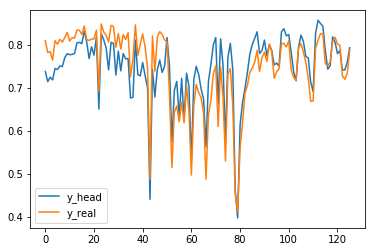

In [18]:
plt.plot(coef[coef.city_id==3].y_head.iloc[0].ravel(),label='y_head')
plt.plot(coef[coef.city_id==3].y_real.iloc[0].ravel(),label='y_real')
plt.legend()

In [19]:
a1=[]
a2=[]
a3=[]
k=[]
r=[]
city_name=[]
city_id=[]
y_head=[]
y_real=[]

for i in city_dict.keys():
    temp=df[df.city_id==i]
    temp['z_score']=np.abs(stats.zscore(temp.compete_f_rate))
    #temp=temp[temp.z_score<=3]
    try:
        model=LinearRegression()
        x=temp[['compete_call_log','tsh_gulf_log','single_pct']]
        y=temp['compete_f_rate']
        model.fit(x,y)
        a1.append(model.coef_[0])
        a2.append(model.coef_[1])
        a3.append(model.coef_[2])
        k.append(model.intercept_)
        r.append(model.score(x,y))
        city_name.append(city_dict[i])
        city_id.append(i)
        y_head.append(model.predict(x))
        y_real.append(y)
    except:
        pass

coef1=pd.DataFrame({'city_id':city_id,'city_name':city_name,
             'a1':a1,
             'a2':a2,
             'a3':a3,
             'k':k,
             'r_square':r})
coef1

,city_id,city_name,a1,a2,a3,k,r_square
0,1,北京市,-0.309818,0.370241,0.294997,-0.020911,0.878447
1,2,深圳市,-0.245954,0.396834,0.534361,-1.132599,0.932278
2,3,广州市,-0.210991,0.293663,0.526928,-0.480086,0.878346
3,4,上海市,-0.308296,0.320845,0.409342,0.487629,0.903901
4,5,杭州市,-0.241496,0.333192,0.360702,-0.374157,0.901152
5,6,武汉市,-0.223747,0.162302,0.341515,1.100697,0.928632
6,7,天津市,-0.162756,0.194464,0.428129,0.113867,0.921937
7,8,沈阳市,-0.204822,0.198867,0.534050,0.474596,0.960894
8,9,郑州市,-0.254733,0.306122,0.325061,0.089293,0.943413
9,10,西安市,-0.251784,0.223737,0.339769,0.797571,0.931030


## 不动基础定价，考虑呼单-C补关系

In [86]:
def get_expected_v6(city_id,c_rate,f_rate,b_rate,divide):
 ## read in parameters   
    temp=parameter_data[parameter_data.city_id==city_id]
    a1,a2,a3,k=coef[coef.city_id==city_id][['a1','a2','a3','k']].iloc[0]
    a1_,a2_,a3_,k_=coef1[coef1.city_id==city_id][['a1','a2','a3','k']].iloc[0]
    current_call=temp['compete_call'].iloc[0]
    current_single_f_rate=temp['single_f_rate'].iloc[0]
    current_compete_f_rate=temp['compete_f_rate'].iloc[0]
    current_gmv=temp['gmv'].iloc[0]
    current_c_rate=temp['c_rate'].iloc[0]
    single_pct=temp['single_pct'].iloc[0]
    
    current_coupon=round(round((1-current_c_rate)/0.05)*0.05,2)
    
    nearest_coupon=round(round((1-c_rate)/0.05)*0.05,2)
    
    grp=elastic.groupby('city_id')
    mm=grp.get_group(city_id)
    
    try:
        call=(mm[mm.coupon==float(nearest_coupon)].ecr.iloc[0]/mm[mm.coupon==float(current_coupon)].ecr.iloc[0])*current_call
        tsh=np.exp((f_rate -k - a3*single_pct - np.log(call)*a1)/a2)
        expected_compete_f_rate=a1_*np.log(call)+a2_*np.log(tsh)+a3_*single_pct+k_
        
        gmv=call*expected_compete_f_rate/current_call/current_compete_f_rate*current_gmv
        iph=gmv*divide*(1+b_rate)/tsh  #0.78线上分成，0% B补
        profit_rate=1-divide-c_rate-b_rate
        return call,tsh, gmv,iph,profit_rate,expected_compete_f_rate
    except:
        return None,None,None,None,None,None

In [74]:
x=get_expected_v6(city_id=1,c_rate=0.1,f_rate=0.77,b_rate=0.03,divide=0.69)
x

(294738.8545132397,
 147165.00335843794,
 360359618.90973985,
 1740.275033564682,
 0.18000000000000005,
 0.6213809065319988)

In [87]:
expected_compete_call=[]
expected_tsh=[]
expected_gmv=[]
expected_iph=[]
profit_rate=[]
city=[]
crate=[]
brate=[]
expected_compete_f_rate=[]
expected_single_f_rate=[]



# call,tsh, gmv,iph,profit_rate,expected_compete_f_rate
driver_divide=0.78
for city_id in list(coef.city_id.unique()):
    for c_rate in ([0,0.05,0.1,0.15,0.2,0.25]):
        for f_rate in ([0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,
                        0.75,0.76,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85]):
            for b_rate in ([0]):
                x=get_expected_v6(city_id=city_id,c_rate=c_rate,f_rate=f_rate,b_rate=b_rate,divide=driver_divide)
                expected_compete_call.append(x[0])
                expected_tsh.append(x[1])
                expected_gmv.append(x[2])
                expected_iph.append(x[3])
                profit_rate.append(x[4])
                expected_compete_f_rate.append(x[5])
            
                city.append(city_id)
                crate.append(c_rate)
                expected_single_f_rate.append(f_rate)
                brate.append(b_rate)
                
                

result=pd.DataFrame({'city_id':city,
                    'expected_compete_call':expected_compete_call,
                     'expected_gmv':expected_gmv,
                     'expected_tsh':expected_tsh,
                     'expected_iph':expected_iph,
                     'expected_profit_rate':profit_rate,
                     'expected_crate':crate,
                     'expected_brate':brate,
                     'expected_compete_f_rate':expected_compete_f_rate,
                     'expected_single_f_rate':expected_single_f_rate,
                     'expected_divide':driver_divide
                     
                    })
#result=result[result.expected_call.notnull()]
result.head()

,city_id,expected_compete_call,expected_gmv,expected_tsh,expected_iph,expected_profit_rate,expected_crate,expected_brate,expected_compete_f_rate,expected_single_f_rate,expected_divide
0,1,225667.628329,5.578897e+06,60816.228475,71.552275,0.22,0.0,0,0.376929,0.60,0.78
1,1,225667.628329,5.805804e+06,63387.312674,71.442168,0.22,0.0,0,0.392260,0.61,0.78
2,1,225667.628329,6.032711e+06,66067.092762,71.223273,0.22,0.0,0,0.407590,0.62,0.78
3,1,225667.628329,6.259618e+06,68860.163996,70.904596,0.22,0.0,0,0.422921,0.63,0.78
4,1,225667.628329,6.486525e+06,71771.315905,70.494593,0.22,0.0,0,0.438251,0.64,0.78


In [88]:
output=parameter_data.merge(result,how='left',left_on='city_id',right_on='city_id')
output=output.merge(city_iph[['city_id', ' green ', ' blue ', ' yellow ', ' orange ']],
                    left_on='city_id',right_on='city_id')
output=output.merge(const[['city_id','city_name','top_finish','bottom_single_f_rate']],left_on='city_id',right_on='city_id')

In [151]:
output[output.city_id==25]

,city_id,single_call,finish,compete_f_rate,single_f_rate,gulf_tsh,fast_tsh,gulf_iph,fast_iph,gmv,sub_c,profit,c_rate,profit_rate,compete_call,single_pct,expected_compete_call,expected_gmv,expected_tsh,expected_iph,expected_profit_rate,expected_crate,expected_brate,expected_compete_f_rate,expected_single_f_rate,expected_divide,green,blue,yellow,orange,city_name,top_finish,bottom_single_f_rate,expected_finish
3600,25,5655.9,6256.7,0.502525,0.62718,5533.543333,43924.14389,38.209901,32.780258,280722.812,33801.9759,19825.18002,0.120411,0.070622,12450.533323,0.45427,11014.847554,2.306013e+05,4226.976808,42.552634,0.22,0.00,0.0,0.466607,0.60,0.78,39.0,36.0,33.0,31.0,长春市,9192.446,0.72,5139.600232
3601,25,5655.9,6256.7,0.502525,0.62718,5533.543333,43924.14389,38.209901,32.780258,280722.812,33801.9759,19825.18002,0.120411,0.070622,12450.533323,0.45427,11014.847554,2.357039e+05,4529.296963,40.591078,0.22,0.00,0.0,0.476931,0.61,0.78,39.0,36.0,33.0,31.0,长春市,9192.446,0.72,5253.326619
3602,25,5655.9,6256.7,0.502525,0.62718,5533.543333,43924.14389,38.209901,32.780258,280722.812,33801.9759,19825.18002,0.120411,0.070622,12450.533323,0.45427,11014.847554,2.408065e+05,4853.239541,38.701797,0.22,0.00,0.0,0.487256,0.62,0.78,39.0,36.0,33.0,31.0,长春市,9192.446,0.72,5367.053006
3603,25,5655.9,6256.7,0.502525,0.62718,5533.543333,43924.14389,38.209901,32.780258,280722.812,33801.9759,19825.18002,0.120411,0.070622,12450.533323,0.45427,11014.847554,2.459092e+05,5200.351011,36.883883,0.22,0.00,0.0,0.497581,0.63,0.78,39.0,36.0,33.0,31.0,长春市,9192.446,0.72,5480.779393
3604,25,5655.9,6256.7,0.502525,0.62718,5533.543333,43924.14389,38.209901,32.780258,280722.812,33801.9759,19825.18002,0.120411,0.070622,12450.533323,0.45427,11014.847554,2.510118e+05,5572.288449,35.136226,0.22,0.00,0.0,0.507906,0.64,0.78,39.0,36.0,33.0,31.0,长春市,9192.446,0.72,5594.505780
3605,25,5655.9,6256.7,0.502525,0.62718,5533.543333,43924.14389,38.209901,32.780258,280722.812,33801.9759,19825.18002,0.120411,0.070622,12450.533323,0.45427,11014.847554,2.561144e+05,5970.827450,33.457546,0.22,0.00,0.0,0.518231,0.65,0.78,39.0,36.0,33.0,31.0,长春市,9192.446,0.72,5708.232167
3606,25,5655.9,6256.7,0.502525,0.62718,5533.543333,43924.14389,38.209901,32.780258,280722.812,33801.9759,19825.18002,0.120411,0.070622,12450.533323,0.45427,11014.847554,2.612170e+05,6397.870598,31.846421,0.22,0.00,0.0,0.528556,0.66,0.78,39.0,36.0,33.0,31.0,长春市,9192.446,0.72,5821.958554
3607,25,5655.9,6256.7,0.502525,0.62718,5533.543333,43924.14389,38.209901,32.780258,280722.812,33801.9759,19825.18002,0.120411,0.070622,12450.533323,0.45427,11014.847554,2.663197e+05,6855.456556,30.301312,0.22,0.00,0.0,0.538880,0.67,0.78,39.0,36.0,33.0,31.0,长春市,9192.446,0.72,5935.684941
3608,25,5655.9,6256.7,0.502525,0.62718,5533.543333,43924.14389,38.209901,32.780258,280722.812,33801.9759,19825.18002,0.120411,0.070622,12450.533323,0.45427,11014.847554,2.714223e+05,7345.769796,28.820584,0.22,0.00,0.0,0.549205,0.68,0.78,39.0,36.0,33.0,31.0,长春市,9192.446,0.72,6049.411329
3609,25,5655.9,6256.7,0.502525,0.62718,5533.543333,43924.14389,38.209901,32.780258,280722.812,33801.9759,19825.18002,0.120411,0.070622,12450.533323,0.45427,11014.847554,2.765249e+05,7871.151024,27.402526,0.22,0.00,0.0,0.559530,0.69,0.78,39.0,36.0,33.0,31.0,长春市,9192.446,0.72,6163.137716


In [157]:
final=output[#(output.expected_profit_rate>=0)&
             (output.expected_single_f_rate>= output.bottom_single_f_rate)&
             (output.expected_finish<=output.top_finish)
    &(output.expected_iph>=output[' orange '])
].reset_index()
final['expected_finish']=final.expected_compete_call*final.expected_compete_f_rate
final=final[(final.city_id==7)|(final.city_id==13)|(final.city_id==34)]
#final=final.loc[final['expected_finish'].idxmax()]
final=final.loc[final.groupby(['city_id','city_name']).idxmax()['expected_finish']]
final['finish_increase']=final['expected_finish']/final['finish']-1
final['tsh_increase']=final['expected_tsh']/final['gulf_tsh']-1
final['call_increase']=final['expected_compete_call']/final['compete_call']-1
final

,index,city_id,single_call,finish,compete_f_rate,single_f_rate,gulf_tsh,fast_tsh,gulf_iph,fast_iph,gmv,sub_c,profit,c_rate,profit_rate,compete_call,single_pct,expected_compete_call,expected_gmv,expected_tsh,expected_iph,expected_profit_rate,expected_crate,expected_brate,expected_compete_f_rate,expected_single_f_rate,expected_divide,green,blue,yellow,orange,city_name,top_finish,bottom_single_f_rate,expected_finish,finish_increase,tsh_increase,call_increase
233,1038,7,11740.73333,12421.133330,0.533581,0.799246,11604.948890,204931.68500,35.419817,33.262979,541776.6737,111145.60340,-6083.607427,0.205150,-0.011229,23278.833349,0.504352,30431.437581,677702.605615,14322.479134,36.907579,-0.03,0.25,0.0,0.510573,0.73,0.78,42.5,41.0,38.0,36.0,天津市,28738.69518,0.72,15537.461894,0.250889,0.234170,0.307258
407,1941,13,11254.46667,13112.633330,0.618952,0.762124,10201.199440,130507.29280,42.828917,27.805106,596892.9920,120679.98950,11890.421770,0.202180,0.019921,21185.233339,0.531241,25409.261718,646208.517114,13195.472238,38.198151,-0.03,0.25,0.0,0.558694,0.76,0.78,45.0,42.0,39.0,37.0,青岛市,23834.53316,0.72,14196.004063,0.082620,0.293522,0.199386
1047,4645,34,8040.80000,8986.166667,0.671094,0.776573,8000.202778,78765.75889,46.108267,37.714502,485147.7677,55103.50023,36714.114700,0.113581,0.075676,13390.333333,0.600493,16969.067724,587124.925449,10839.244780,42.249940,-0.03,0.25,0.0,0.640874,0.81,0.78,50.5,47.0,44.0,42.0,福州市,13852.33267,0.72,10875.042174,0.210198,0.354871,0.267263


In [163]:
#final=output
#final['expected_finish']=final.expected_compete_call*final.expected_compete_f_rate
final=output[(output.expected_profit_rate>=-0.05)&
             (output.expected_single_f_rate>=output.bottom_single_f_rate)&
             (output.expected_finish<=output.top_finish)&
             (output.expected_iph>=output[' orange '])].reset_index()
final['expected_finish']=final.expected_compete_call*final.expected_compete_f_rate
final=final.iloc[final.groupby(['city_id','city_name']).idxmax()['expected_finish']]
#final['is_gmv_increase']=np.where(final['expected_gmv']>final['gmv'],1,0)
#final['gmv_increase']=final['expected_gmv']/final['gmv']-1
final['finish_increase']=final['expected_finish']/final['finish']-1
final['tsh_increase']=final['expected_tsh']/final['gulf_tsh']-1
final['call_increase']=final['expected_compete_call']/final['compete_call']-1
final=final[final['finish_increase']>0]
final.head()

,index,city_id,single_call,finish,compete_f_rate,single_f_rate,gulf_tsh,fast_tsh,gulf_iph,fast_iph,gmv,sub_c,profit,c_rate,profit_rate,compete_call,single_pct,expected_compete_call,expected_gmv,expected_tsh,expected_iph,expected_profit_rate,expected_crate,expected_brate,expected_compete_f_rate,expected_single_f_rate,expected_divide,green,blue,yellow,orange,city_name,top_finish,bottom_single_f_rate,expected_finish,finish_increase,tsh_increase,call_increase
33,72,1,116910.13330,175642.43330,0.705204,0.805769,146708.35440,533728.0717,63.122948,50.547954,1.151991e+07,513539.7137,1.254018e+06,0.044578,0.108857,249066.099863,0.469394,294738.854513,1.379013e+07,188669.492993,57.011359,0.12,0.10,0.0,0.713365,0.83,0.78,61.0,58.0,55.0,53.0,北京市,212489.08930,0.72,210256.245229,0.197070,0.286017,0.183376
87,245,2,39802.60000,45900.16667,0.755400,0.820769,43385.52222,368189.2517,56.521834,43.048627,3.186179e+06,233956.4320,4.016965e+05,0.073429,0.126075,60762.766683,0.655049,90977.250039,4.603304e+06,53415.534147,67.219715,0.07,0.15,0.0,0.728922,0.81,0.78,61.0,58.0,55.0,53.0,深圳市,66385.80267,0.72,66315.303344,0.444773,0.231183,0.497253
121,398,3,36684.50000,36543.46667,0.644340,0.762634,36544.59389,326350.8283,54.310475,41.111723,2.623220e+06,221355.0450,2.802378e+05,0.084383,0.106830,56714.566674,0.646827,62274.705578,3.050949e+06,45697.568705,52.075863,0.07,0.15,0.0,0.682493,0.84,0.78,59.0,56.5,53.5,51.5,广州市,52574.78467,0.72,42502.065809,0.163055,0.250460,0.098037
166,591,4,76043.13333,101173.56670,0.755223,0.817472,83894.34778,416972.2911,72.449035,49.440296,7.445316e+06,464263.6733,5.592708e+05,0.062356,0.075117,133965.100068,0.567634,194312.568215,9.322637e+06,97629.647957,74.482059,-0.03,0.25,0.0,0.651961,0.76,0.78,79.0,75.0,72.0,70.0,上海市,128029.50670,0.72,126684.284433,0.252148,0.163721,0.450472
191,691,5,25105.40000,28415.80000,0.601813,0.735283,25795.19500,220521.7156,53.351563,43.311668,1.786708e+06,113481.5495,2.059987e+05,0.063514,0.115295,47217.000029,0.531703,66720.886229,2.572634e+06,34168.524620,58.728150,0.07,0.15,0.0,0.613229,0.76,0.78,58.0,57.0,54.0,52.0,杭州市,41598.95800,0.72,40915.159660,0.439874,0.324608,0.413069


In [95]:
final.to_csv('/Users/didi/Desktop/finish_ceil.csv',encoding='gbk')

In [166]:
final

,index,city_id,single_call,finish,compete_f_rate,single_f_rate,gulf_tsh,fast_tsh,gulf_iph,fast_iph,gmv,sub_c,profit,c_rate,profit_rate,compete_call,single_pct,expected_compete_call,expected_gmv,expected_tsh,expected_iph,expected_profit_rate,expected_crate,expected_brate,expected_compete_f_rate,expected_single_f_rate,expected_divide,green,blue,yellow,orange,city_name,top_finish,bottom_single_f_rate,expected_finish,finish_increase,tsh_increase,call_increase
33,72,1,116910.133300,175642.433300,0.705204,0.805769,146708.354400,533728.07170,63.122948,50.547954,1.151991e+07,513539.713700,1.254018e+06,0.044578,0.108857,249066.099863,0.469394,294738.854513,1.379013e+07,188669.492993,57.011359,0.12,0.10,0.0,0.713365,0.83,0.78,61.0,58.0,55.0,53.0,北京市,212489.089300,0.72,210256.245229,0.197070,0.286017,0.183376
87,245,2,39802.600000,45900.166670,0.755400,0.820769,43385.522220,368189.25170,56.521834,43.048627,3.186179e+06,233956.432000,4.016965e+05,0.073429,0.126075,60762.766683,0.655049,90977.250039,4.603304e+06,53415.534147,67.219715,0.07,0.15,0.0,0.728922,0.81,0.78,61.0,58.0,55.0,53.0,深圳市,66385.802670,0.72,66315.303344,0.444773,0.231183,0.497253
121,398,3,36684.500000,36543.466670,0.644340,0.762634,36544.593890,326350.82830,54.310475,41.111723,2.623220e+06,221355.045000,2.802378e+05,0.084383,0.106830,56714.566674,0.646827,62274.705578,3.050949e+06,45697.568705,52.075863,0.07,0.15,0.0,0.682493,0.84,0.78,59.0,56.5,53.5,51.5,广州市,52574.784670,0.72,42502.065809,0.163055,0.250460,0.098037
166,591,4,76043.133330,101173.566700,0.755223,0.817472,83894.347780,416972.29110,72.449035,49.440296,7.445316e+06,464263.673300,5.592708e+05,0.062356,0.075117,133965.100068,0.567634,194312.568215,9.322637e+06,97629.647957,74.482059,-0.03,0.25,0.0,0.651961,0.76,0.78,79.0,75.0,72.0,70.0,上海市,128029.506700,0.72,126684.284433,0.252148,0.163721,0.450472
191,691,5,25105.400000,28415.800000,0.601813,0.735283,25795.195000,220521.71560,53.351563,43.311668,1.786708e+06,113481.549500,2.059987e+05,0.063514,0.115295,47217.000029,0.531703,66720.886229,2.572634e+06,34168.524620,58.728150,0.07,0.15,0.0,0.613229,0.76,0.78,58.0,57.0,54.0,52.0,杭州市,41598.958000,0.72,40915.159660,0.439874,0.324608,0.413069
210,862,6,11538.233330,13574.100000,0.605756,0.746431,13162.436670,126381.17830,45.453420,36.892269,7.575183e+05,71521.387730,4.590792e+04,0.094415,0.060603,22408.533334,0.514904,31714.791060,9.836144e+05,18907.564798,40.577371,0.02,0.20,0.0,0.555752,0.72,0.78,48.0,45.0,42.0,40.0,武汉市,20505.024000,0.72,17625.555473,0.298470,0.436479,0.415300
233,1038,7,11740.733330,12421.133330,0.533581,0.799246,11604.948890,204931.68500,35.419817,33.262979,5.417767e+05,111145.603400,-6.083607e+03,0.205150,-0.011229,23278.833349,0.504352,30431.437581,6.777026e+05,14322.479134,36.907579,-0.03,0.25,0.0,0.510573,0.73,0.78,42.5,41.0,38.0,36.0,天津市,28738.695180,0.72,15537.461894,0.250889,0.234170,0.307258
260,1142,8,5348.233333,6481.100000,0.631348,0.765761,6326.000556,60006.52111,35.468354,29.322637,3.028008e+05,34440.130830,2.545869e+04,0.113739,0.084077,10265.500001,0.520991,14794.031641,4.475811e+05,11615.907277,30.054754,0.07,0.15,0.0,0.647555,0.78,0.78,36.0,34.0,31.0,29.0,沈阳市,9709.072000,0.72,9579.952705,0.478137,0.836217,0.441141
338,1349,9,11174.166670,12388.233330,0.645594,0.777609,11431.622780,154932.31390,37.900390,29.812355,5.759365e+05,65055.855570,5.053858e+04,0.112957,0.087750,19188.899994,0.582325,33119.931228,9.936318e+05,19123.597165,40.527562,-0.03,0.25,0.0,0.645314,0.85,0.78,43.0,41.0,38.0,36.0,郑州市,24770.028270,0.72,21372.743135,0.725245,0.672868,0.725994
359,1615,11,14805.300000,22056.600000,0.568799,0.671361,15618.210000,150246.80330,57.636599,42.611057,1.129301e+06,113863.919000,6.027778e+04,0.100827,0.053376,38777.499993,0.381801,45904.438915,1.501437e+06,24361.518227,48.072579,0.02,0.20,0.0,0.638824,0.75,0.78,55.0,53.0,50.0,48.0,南京市,32709.200000,0.72,29324.870310,0.329528,0.559815,0.183791


In [80]:
final.city_name.unique()

array(['北京市', '深圳市', '广州市', '上海市', '杭州市', '武汉市', '天津市', '沈阳市', '郑州市',
       '西安市', '南京市', '济南市', '青岛市', '大连市', '合肥市', '哈尔滨市', '成都市', '重庆市',
       '昆明市', '宁波市', '东莞市', '石家庄市', '苏州市', '长沙市', '长春市', '太原市', '洛阳市',
       '烟台市', '厦门市', '南宁市', '福州市', '泉州市', '佛山市', '三亚市', '南昌市', '呼和浩特市',
       '威海市', '常州市', '无锡市', '银川市', '贵阳市', '海口市', '珠海市', '温州市', '金华市',
       '台州市', '嘉兴市', '绍兴市', '扬州市', '中山市', '惠州市', '江门市'], dtype=object)

In [423]:
t=list(set(coef.city_id.unique())-set(final.city_id.unique()))
[city_dict[i] for i in t]
parameter_data[parameter_data.city_id.isin(t)].merge(city_iph[['city_id', ' green ', ' blue ', ' yellow ', ' orange ']],on='city_id')

,city_id,city_name,single_call,finish_call,compete_f_rate,keguan_f_call,single_f_rate,gulf_tsh,fast_tsh,gulf_iph,fast_iph,gmv,sub_c,profit,c_rate,profit_rate,compete_call,single_pct,green,blue,yellow,orange
0,10,西安市,13669,14325,0.464041,0.614735,0.635967,14746,163659,44.69,35.48,761183,54609,71863,0.071742,0.094410,30870.138967,0.442790,50.0,46.0,43.0,41.0
1,16,哈尔滨市,4750,4739,0.424600,0.507798,0.565753,5016,43688,34.98,29.52,233616,16766,23311,0.071767,0.099783,11161.094712,0.425585,37.0,34.8,31.8,29.8
2,25,长春市,5902,5988,0.448957,0.579543,0.608828,5526,41373,35.08,33.07,267265,33802,23353,0.126474,0.087378,13337.584848,0.442509,39.0,36.0,33.0,31.0
3,27,洛阳市,397,143,0.085358,0.165359,0.246412,167,20107,30.76,24.05,7238,478,737,0.066040,0.101824,1675.294884,0.236973,32.0,29.0,26.0,24.0
4,41,呼和浩特市,1237,768,0.305189,0.479347,0.491564,636,22362,39.20,26.80,26469,2301,-2102,0.086932,-0.079414,2516.470224,0.491562,36.5,31.0,28.0,26.0
5,49,银川市,1953,1291,0.221095,0.420693,0.438216,1243,20914,26.84,26.16,43891,3793,3235,0.086419,0.073705,5839.123553,0.334468,32.0,30.0,27.0,25.0
6,87,台州市,953,442,0.146701,0.397489,0.399580,555,63413,23.67,26.22,18102,1665,1642,0.091979,0.090708,3012.930571,0.316303,37.0,33.0,30.0,28.0
7,91,扬州市,509,298,0.147684,0.339786,0.377192,362,16852,37.48,29.40,19665,1409,1532,0.071650,0.077905,2017.828544,0.252251,33.0,28.8,25.8,23.8
8,153,江门市,469,141,0.058201,0.176284,0.192589,95,48866,29.16,32.44,5285,244,577,0.046168,0.109177,2422.618140,0.193592,38.5,35.0,32.0,30.0


In [330]:
filename='/Users/didi/Desktop/规划/城市规模测算.xlsx'

writer = pd.ExcelWriter(filename, engine='openpyxl')
output.to_excel(writer,sheet_name='遍历变量',index=False)
final.to_excel(writer,sheet_name='终态',index=False)
writer.save()

In [338]:
elastic[elastic.city_id==26]

,city_id,coupon,code,ecr
175,26,0.70,26 0.7,0.043688
176,26,0.75,26 0.75,0.033032
177,26,0.80,26 0.8,0.031927
178,26,0.85,26 0.85,0.025942
179,26,0.90,26 0.9,0.021591
180,26,0.95,26 0.95,0.022628
181,26,1.00,26 1,0.020246


# 动基础定价

In [272]:
def get_expected_price(city_id,price_ratio,f_rate,b_rate,divide):
 ## read in parameters   
    temp=parameter_data[parameter_data.city_id==city_id]
    a1,a2,a3,k=coef[coef.city_id==city_id][['a1','a2','a3','k']].iloc[0]
    a1_,a2_,a3_,k_=coef1[coef1.city_id==city_id][['a1','a2','a3','k']].iloc[0]
    current_call=temp['compete_call'].iloc[0]
    current_single_f_rate=temp['single_f_rate'].iloc[0]
    current_compete_f_rate=temp['compete_f_rate'].iloc[0]
    current_gmv=temp['gmv'].iloc[0]
    current_c_rate=temp['c_rate'].iloc[0]
    single_pct=temp['single_pct'].iloc[0]
    gulf_fast_price_ratio=temp['gulf_fast_price_ratio'].iloc[0]
    
    #current_coupon=round(round((1-current_c_rate)/0.05)*0.05,2)
    
    #nearest_coupon=round(round((1-c_rate)/0.05)*0.05,2)
    nearest_coupon=round(round((price_ratio/gulf_fast_price_ratio)/0.05)*0.05,2)
    
    grp=elastic.groupby('city_id')
    mm=grp.get_group(city_id)
    
    try:
        #call=(mm[mm.coupon==float(nearest_coupon)].ecr.iloc[0]/mm[mm.coupon==float(current_coupon)].ecr.iloc[0])*current_call
        call=(mm[mm.coupon==float(nearest_coupon)].ecr.iloc[0]/mm[mm.coupon==1].ecr.iloc[0])*current_call
        tsh=np.exp((f_rate -k - a3*single_pct - np.log(call)*a1)/a2)
        expected_compete_f_rate=a1_*np.log(call)+a2_*np.log(tsh)+a3_*single_pct+k_
        
        gmv=call*expected_compete_f_rate/current_call/current_compete_f_rate*current_gmv*price_ratio/gulf_fast_price_ratio
        iph=gmv*divide*(1+b_rate)/tsh  #0.78线上分成，0% B补
        #profit_rate=1-divide-c_rate-b_rate
        return call,tsh, gmv,iph,expected_compete_f_rate
    except:
        return None,None,None,None,None

In [274]:
get_expected_price(city_id=3,price_ratio=1.2,f_rate=0.77,b_rate=0,divide=0.78)

(81489.2047874198,
 45733.014816278956,
 3084995.81891927,
 52.616184356612635,
 0.6259822169692326)

In [323]:
expected_compete_call=[]
expected_tsh=[]
expected_gmv=[]
expected_iph=[]
city=[]
price=[]
brate=[]
expected_compete_f_rate=[]
expected_single_f_rate=[]



# call,tsh, gmv,iph,profit_rate,expected_compete_f_rate
driver_divide=0.78
for city_id in list(coef.city_id.unique()):
    for price_ratio in ([1.2,1.3,1.4,1.5,1.6]):
        for f_rate in ([0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,
                        0.75,0.76,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85]):
            for b_rate in ([0]):
                x=get_expected_price(city_id=city_id,price_ratio=price_ratio,f_rate=f_rate,b_rate=b_rate,divide=driver_divide)
                expected_compete_call.append(x[0])
                expected_tsh.append(x[1])
                expected_gmv.append(x[2])
                expected_iph.append(x[3])
                expected_compete_f_rate.append(x[4])
            
                city.append(city_id)
                price.append(price_ratio)
                expected_single_f_rate.append(f_rate)
                brate.append(b_rate)
                
                

result=pd.DataFrame({'city_id':city,
                    'expected_compete_call':expected_compete_call,
                     'expected_gmv':expected_gmv,
                     'expected_tsh':expected_tsh,
                     'expected_iph':expected_iph,
                     'expected_price_ratio':price,
                     'expected_brate':brate,
                     'expected_compete_f_rate':expected_compete_f_rate,
                     'expected_single_f_rate':expected_single_f_rate,
                     'expected_divide':driver_divide
                     
                    })
#result=result[result.expected_call.notnull()]
result.head()

,city_id,expected_compete_call,expected_gmv,expected_tsh,expected_iph,expected_price_ratio,expected_brate,expected_compete_f_rate,expected_single_f_rate,expected_divide
0,1,525591.201896,8.580975e+06,107454.763862,62.288168,1.2,0,0.325737,0.60,0.78
1,1,525591.201896,8.984833e+06,111997.552069,62.574314,1.2,0,0.341067,0.61,0.78
2,1,525591.201896,9.388692e+06,116732.392485,62.734768,1.2,0,0.356398,0.62,0.78
3,1,525591.201896,9.792550e+06,121667.404362,62.779256,1.2,0,0.371729,0.63,0.78
4,1,525591.201896,1.019641e+07,126811.050208,62.716921,1.2,0,0.387059,0.64,0.78


In [282]:
output=parameter_data.merge(result,how='left',left_on='city_id',right_on='city_id')
output=output.merge(city_iph[['city_id', ' green ', ' blue ', ' yellow ', ' orange ']],
                    left_on='city_id',right_on='city_id')
output=output.merge(const[['city_id','city_name','top_finish','bottom_single_f_rate']],left_on='city_id',right_on='city_id')

In [352]:
output['expected_finish']=output.expected_compete_call*output.expected_compete_f_rate
top=[1,4,2,3,17,5,11,10,23,12,6,32,13,7,9,18,24,21,19,34]
output=output[output.city_id.isin(top)]
final=output[(output.expected_compete_call>=output.expected_call*0.98)&
            # (output.expected_single_f_rate>=output.bottom_single_f_rate-0.03)&
            #(output.expected_finish<=output.top_finish)&
             #(output.expected_gmv>=output.gmv)&
             (output.expected_iph>=output[' orange ']*0.9)
            ].reset_index()
final['expected_finish']=final.expected_compete_call*final.expected_compete_f_rate
final=final.iloc[final.groupby(['city_id','city_name']).idxmin()['expected_price_ratio']]
#final['is_gmv_increase']=np.where(final['expected_gmv']>final['gmv'],1,0)
#final['gmv_increase']=final['expected_gmv']/final['gmv']-1
#final['finish_increase']=final['expected_finish']/final['finish']-1
#final['tsh_increase']=final['expected_tsh']/final['gulf_tsh']-1
#final['call_increase']=final['expected_compete_call']/final['compete_call']-1
#final=final[final['finish_increase']>0]
final.shape

(17, 37)

In [337]:
set(top)-set(final.city_id.unique())

{4, 6, 9, 10, 12, 17, 19, 21, 23, 24, 34}

In [345]:
set(top)-set(final.city_id.unique())

{6, 21, 23}

In [328]:
output[(output.city_id==4)]

,city_id,single_call,finish,compete_f_rate,single_f_rate,gulf_tsh,fast_tsh,gulf_iph,fast_iph,gmv,sub_c,profit,gulf_fast_price_ratio,expected_call,service_score,c_rate,profit_rate,compete_call,single_pct,expected_compete_call,expected_gmv,expected_tsh,expected_iph,expected_price_ratio,expected_brate,expected_compete_f_rate,expected_single_f_rate,expected_divide,green,blue,yellow,orange,city_name,top_finish,bottom_single_f_rate,expected_finish
375,4,76043.13333,101173.5667,0.755223,0.817472,83894.34778,416972.2911,72.449035,49.440296,7445315.643,464263.6733,559270.8283,1.609893,186540.065472,102.66,0.062356,0.075117,133965.100068,0.567634,214450.852194,4.919943e+06,51805.670020,74.075980,1.2,0.0,0.418246,0.60,0.78,79.0,75.0,72.0,70.0,上海市,128029.5067,0.72,89693.260562
376,4,76043.13333,101173.5667,0.755223,0.817472,83894.34778,416972.2911,72.449035,49.440296,7445315.643,464263.6733,559270.8283,1.609893,186540.065472,102.66,0.062356,0.075117,133965.100068,0.567634,214450.852194,5.101520e+06,54358.980212,73.201992,1.2,0.0,0.433682,0.61,0.78,79.0,75.0,72.0,70.0,上海市,128029.5067,0.72,93003.503173
377,4,76043.13333,101173.5667,0.755223,0.817472,83894.34778,416972.2911,72.449035,49.440296,7445315.643,464263.6733,559270.8283,1.609893,186540.065472,102.66,0.062356,0.075117,133965.100068,0.567634,214450.852194,5.283097e+06,57038.133635,72.246674,1.2,0.0,0.449118,0.62,0.78,79.0,75.0,72.0,70.0,上海市,128029.5067,0.72,96313.745783
378,4,76043.13333,101173.5667,0.755223,0.817472,83894.34778,416972.2911,72.449035,49.440296,7445315.643,464263.6733,559270.8283,1.609893,186540.065472,102.66,0.062356,0.075117,133965.100068,0.567634,214450.852194,5.464673e+06,59849.332639,71.219596,1.2,0.0,0.464554,0.63,0.78,79.0,75.0,72.0,70.0,上海市,128029.5067,0.72,99623.988393
379,4,76043.13333,101173.5667,0.755223,0.817472,83894.34778,416972.2911,72.449035,49.440296,7445315.643,464263.6733,559270.8283,1.609893,186540.065472,102.66,0.062356,0.075117,133965.100068,0.567634,214450.852194,5.646250e+06,62799.085261,70.129606,1.2,0.0,0.479990,0.64,0.78,79.0,75.0,72.0,70.0,上海市,128029.5067,0.72,102934.231003
380,4,76043.13333,101173.5667,0.755223,0.817472,83894.34778,416972.2911,72.449035,49.440296,7445315.643,464263.6733,559270.8283,1.609893,186540.065472,102.66,0.062356,0.075117,133965.100068,0.567634,214450.852194,5.827827e+06,65894.220299,68.984880,1.2,0.0,0.495426,0.65,0.78,79.0,75.0,72.0,70.0,上海市,128029.5067,0.72,106244.473614
381,4,76043.13333,101173.5667,0.755223,0.817472,83894.34778,416972.2911,72.449035,49.440296,7445315.643,464263.6733,559270.8283,1.609893,186540.065472,102.66,0.062356,0.075117,133965.100068,0.567634,214450.852194,6.009404e+06,69141.903115,67.792967,1.2,0.0,0.510862,0.66,0.78,79.0,75.0,72.0,70.0,上海市,128029.5067,0.72,109554.716224
382,4,76043.13333,101173.5667,0.755223,0.817472,83894.34778,416972.2911,72.449035,49.440296,7445315.643,464263.6733,559270.8283,1.609893,186540.065472,102.66,0.062356,0.075117,133965.100068,0.567634,214450.852194,6.190980e+06,72549.652225,66.560823,1.2,0.0,0.526298,0.67,0.78,79.0,75.0,72.0,70.0,上海市,128029.5067,0.72,112864.958834
383,4,76043.13333,101173.5667,0.755223,0.817472,83894.34778,416972.2911,72.449035,49.440296,7445315.643,464263.6733,559270.8283,1.609893,186540.065472,102.66,0.062356,0.075117,133965.100068,0.567634,214450.852194,6.372557e+06,76125.356706,65.294858,1.2,0.0,0.541733,0.68,0.78,79.0,75.0,72.0,70.0,上海市,128029.5067,0.72,116175.201445
384,4,76043.13333,101173.5667,0.755223,0.817472,83894.34778,416972.2911,72.449035,49.440296,7445315.643,464263.6733,559270.8283,1.609893,186540.065472,102.66,0.062356,0.075117,133965.100068,0.567634,214450.852194,6.554134e+06,79877.294458,64.000969,1.2,0.0,0.557169,0.69,0.78,79.0,75.0,72.0,70.0,上海市,128029.5067,0.72,119485.444055


In [356]:
elastic[elastic.city_id==21]

,city_id,coupon,code,ecr
140,21,0.70,21 0.7,0.064014
141,21,0.75,21 0.75,0.051546
142,21,0.80,21 0.8,0.037827
143,21,0.85,21 0.85,0.031203
144,21,0.90,21 0.9,0.022827
145,21,0.95,21 0.95,0.021740
146,21,1.00,21 1,0.023356
